In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import vgg16
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import top_k_categorical_accuracy


# Define the top-5-accuracy metric
def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)
# Load CIFAR-100 data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices
num_classes = 100
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Load VGG16 without the top (fully connected) layers
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers on top of the VGG16 convolutional base
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Freeze the base_model
base_model.trainable = False

# Compile the model
model.compile(optimizer=optimizers.Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy',top_5_accuracy])
print(model.summary())
# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=45, validation_data=(x_test, y_test))



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
Total params: 15,028,644
Trainable params: 313,956
Non-trainable params: 14,714,688
_________________________________________________________________
None
Epoch 1/45
391/391 [===========

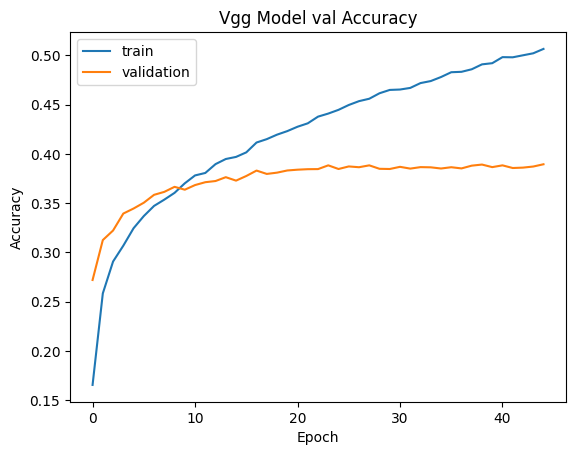

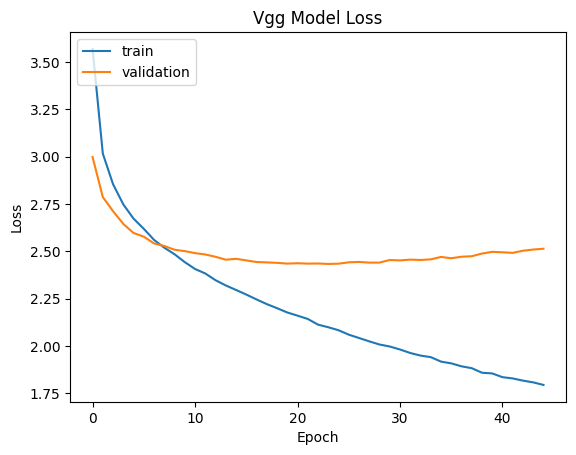

In [6]:
# Plot the accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Vgg Model val Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Vgg Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [5]:
y_pred = model.predict(x_test)
import numpy as np
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
from sklearn.metrics import precision_recall_fscore_support

# Calculate the precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true_classes, y_pred_classes, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


313/313 [==============================] - 3s 7ms/step
Precision: 0.3892999987967275
Recall: 0.3895
F1-score: 0.3840785483769441
